<div style="display:block">
    <div style="width: 20%; display: inline-block; text-align: left;">
    </div>
    <div style="width: 59%; display: inline-block">
        <h1  style="text-align: center">$k$-Means Clustering with Tensorflow</h1>
        <div style="width: 85%; text-align: center; display: inline-block;"><i>Authors:</i> <strong>Manoj Kumar Das </strong> </div>
    </div>
    <div style="width: 20%; text-align: right; display: inline-block;">
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Created: </i>
            <time datetime="2014-03-10" pubdate>December 5, 2017</time>
        </div>
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Modified: </i>
            <time datetime="2014-03-12" pubdate>April 15, 2019</time>
        </div>
    </div>
</div>

#### Introduction 
In this small example notebook we will run you through on how to use tesnorflow for perfomring a $k$-means clustering.The objective of this notebook is for you to understand the k-means clustering algorithm and how to impliment it using tensorflow. For understanding and learning of k-means clustering, I would suggets to just google it. We firts have random point generated in 2 dimension plane, and now our objective is to cluster this points into $k$ clusters. This example has been taken from [1] in refrences. 

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

numPoints = 10000
numClusters = 7
numSteps = 10

#### Generating and plotiing the points on 2D plane

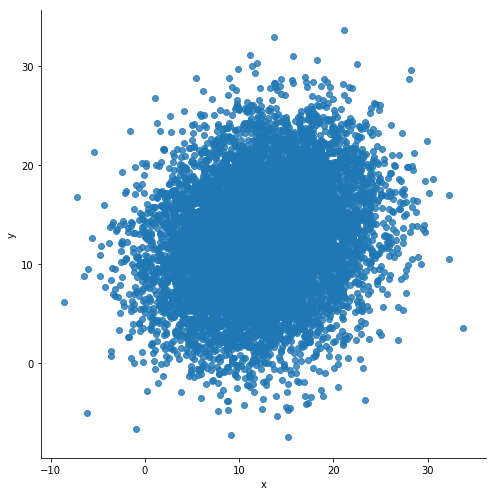

In [2]:
points = np.random.rand(numPoints, 1) > 0.5
points = points * np.random.normal(10, 5, (numPoints, 2)) + (1- points) * np.random.normal(15, 5, (numPoints, 2))
df = pd.DataFrame({"x": points[:,0], "y": points[:,1]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=7)

In [3]:
points

array([[11.5933605 , 19.51876844],
       [16.90970713, 18.29275717],
       [20.093522  , 11.85329987],
       ...,
       [17.15094836, 23.00248155],
       [20.67452229, 17.62807475],
       [18.62259957, 14.80922235]])

#### Defining the graph fpr centroids and update for new centroids

In [4]:
vectors = tf.constant(points)
centroids = tf.Variable(tf.reshape(tf.random_shuffle(vectors)[:numClusters], [numClusters, 1, -1]))
diff = tf.subtract(vectors, centroids)
distances = tf.reduce_sum(tf.square(diff), 2)
assignment = tf.argmin(distances, 0)

newCentroids = tf.reshape(tf.concat(list(map(lambda x: \
             tf.reduce_mean(tf.gather(vectors, tf.where(tf.equal(assignment, x))), 0), 
                            np.arange(numClusters))), 0), [numClusters, 1, -1])
updateCentroids = tf.assign(centroids, newCentroids)

#### Beginning the iterative process

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

def clusterFunc(sess, updateCentroids, centroids, assignment, step):
    _, centroids_values, assignment_values = sess.run([updateCentroids, centroids, assignment])
    print("for step ", step, ": ", assignment_values)

list(map(lambda step: clusterFunc(sess, updateCentroids, centroids, assignment, step), range(numSteps)));

for step  0 :  [4 2 0 ... 2 2 0]
for step  1 :  [4 2 0 ... 2 2 0]
for step  2 :  [4 2 0 ... 2 3 0]
for step  3 :  [4 2 0 ... 2 3 0]
for step  4 :  [4 2 0 ... 2 3 3]
for step  5 :  [4 2 0 ... 2 3 3]
for step  6 :  [2 2 3 ... 2 3 3]
for step  7 :  [2 2 3 ... 2 3 3]
for step  8 :  [2 2 3 ... 2 3 3]
for step  9 :  [2 2 3 ... 2 3 3]


#### The evaluated centroids

In [6]:
df["cluster"] = assignment.eval(session=sess)
print(centroids.eval(session=sess))

[[[16.95189826  8.20594418]]

 [[10.13722065  4.51626869]]

 [[15.61601896 21.0527801 ]]

 [[20.6526122  15.34321414]]

 [[12.76070083 13.51553576]]

 [[ 5.01084033  9.54242376]]

 [[ 7.21637777 17.40605781]]]


#### Showcasing the clusters

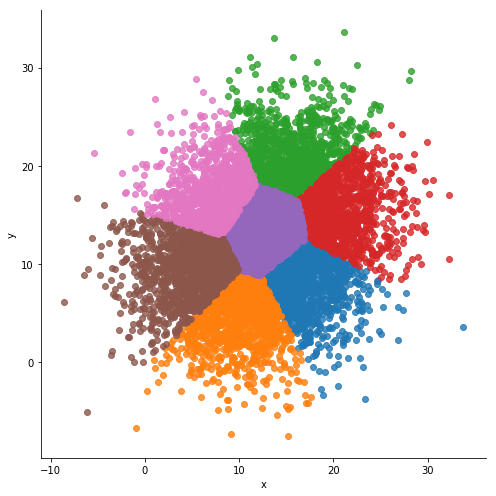

In [7]:
sns.lmplot("x", "y", data=df, fit_reg=False, size=7, hue="cluster", legend=False)

#### Refrences
[1] [First contact with Tensorflow](http://jorditorres.org/research-teaching/tensorflow/first-contact-with-tensorflow-book/first-contact-with-tensorflow/)

To The King